# 3.1 Classification with a single-layer perceptron

In [3]:
import numpy as np

### 3.1.1 Generation of linearly-separable data

In [4]:
n = 100

mA = [5, 2]
sigma = 4

aX = np.random.normal(mA[0], sigma, n)
aY = np.random.normal(mA[1], sigma, n)

In [5]:
a = np.stack((aX, aY, np.zeros(n)), axis=1)

In [6]:
mB = [-16, 22]
sigma = 4

bX = np.random.normal(mB[0], sigma, n)
bY = np.random.normal(mB[1], sigma, n)

In [7]:
b = np.stack((bX, bY, np.ones(n)), axis=1)

In [8]:
a

array([[ 5.08596583,  2.30096464,  0.        ],
       [ 5.78081546,  8.50391412,  0.        ],
       [ 5.56542855,  1.56966145,  0.        ],
       [ 5.28558682,  2.1617226 ,  0.        ],
       [ 5.95360674,  3.60091352,  0.        ],
       [ 5.04646879,  1.24024317,  0.        ],
       [ 0.25859937, -2.73640818,  0.        ],
       [10.38622435,  1.73879866,  0.        ],
       [ 1.26190957,  3.2742726 ,  0.        ],
       [ 1.58948693,  6.34460945,  0.        ],
       [ 7.02849783, -1.46275124,  0.        ],
       [ 7.69235179,  0.80283447,  0.        ],
       [ 1.85705742,  1.80790987,  0.        ],
       [ 9.82834076,  7.32278457,  0.        ],
       [ 9.33286621,  0.28095888,  0.        ],
       [ 5.35421907, -1.67896203,  0.        ],
       [ 3.03980871,  2.48683819,  0.        ],
       [ 5.02341765,  4.75834232,  0.        ],
       [ 6.0345316 ,  2.1956325 ,  0.        ],
       [10.05135549, -0.18139128,  0.        ],
       [ 6.29289214, 12.2715129 ,  0.   

In [9]:
b

array([[-18.31731884,  23.79537938,   1.        ],
       [-14.17501053,  19.49667717,   1.        ],
       [-21.4154211 ,  22.14633461,   1.        ],
       [-13.74881261,  12.43379452,   1.        ],
       [-16.48263882,  24.72404278,   1.        ],
       [-17.94885572,  23.44003898,   1.        ],
       [-13.63664345,  23.21514085,   1.        ],
       [-16.65007448,  22.17182123,   1.        ],
       [-21.60671087,  24.86107408,   1.        ],
       [-19.47468057,  29.81009798,   1.        ],
       [-15.10471925,  24.17955098,   1.        ],
       [-18.07203074,  16.8684238 ,   1.        ],
       [-17.01507414,  20.39482426,   1.        ],
       [-10.24340741,  23.72450701,   1.        ],
       [-13.64438456,  23.139986  ,   1.        ],
       [-15.52450194,  22.71623616,   1.        ],
       [-22.63330748,  19.00106418,   1.        ],
       [ -7.98072575,  22.33652723,   1.        ],
       [-14.09273815,  21.10033019,   1.        ],
       [-11.87662521,  22.63149

In [10]:
dataset = np.concatenate((a, b), axis=0)
dataset.shape, dataset

((200, 3),
 array([[ 5.08596583e+00,  2.30096464e+00,  0.00000000e+00],
        [ 5.78081546e+00,  8.50391412e+00,  0.00000000e+00],
        [ 5.56542855e+00,  1.56966145e+00,  0.00000000e+00],
        [ 5.28558682e+00,  2.16172260e+00,  0.00000000e+00],
        [ 5.95360674e+00,  3.60091352e+00,  0.00000000e+00],
        [ 5.04646879e+00,  1.24024317e+00,  0.00000000e+00],
        [ 2.58599373e-01, -2.73640818e+00,  0.00000000e+00],
        [ 1.03862243e+01,  1.73879866e+00,  0.00000000e+00],
        [ 1.26190957e+00,  3.27427260e+00,  0.00000000e+00],
        [ 1.58948693e+00,  6.34460945e+00,  0.00000000e+00],
        [ 7.02849783e+00, -1.46275124e+00,  0.00000000e+00],
        [ 7.69235179e+00,  8.02834468e-01,  0.00000000e+00],
        [ 1.85705742e+00,  1.80790987e+00,  0.00000000e+00],
        [ 9.82834076e+00,  7.32278457e+00,  0.00000000e+00],
        [ 9.33286621e+00,  2.80958877e-01,  0.00000000e+00],
        [ 5.35421907e+00, -1.67896203e+00,  0.00000000e+00],
        [ 3.0

In [11]:
np.random.shuffle(dataset)
dataset

array([[ 6.74765752e-01,  6.85343508e+00,  0.00000000e+00],
       [ 1.71161926e-01,  4.47827185e-01,  0.00000000e+00],
       [-1.83414142e+01,  1.81739821e+01,  1.00000000e+00],
       [ 7.69235179e+00,  8.02834468e-01,  0.00000000e+00],
       [ 6.41429631e+00,  8.78879777e-01,  0.00000000e+00],
       [-1.53373678e+01,  2.17495279e+01,  1.00000000e+00],
       [ 1.57617846e+00,  2.71667014e-01,  0.00000000e+00],
       [-1.74310587e+01,  1.43516520e+01,  1.00000000e+00],
       [ 5.60081680e+00,  7.74604962e+00,  0.00000000e+00],
       [-7.98072575e+00,  2.23365272e+01,  1.00000000e+00],
       [-1.50230313e+01,  2.06140758e+01,  1.00000000e+00],
       [-1.70694404e+01,  1.49858395e+01,  1.00000000e+00],
       [-1.61184271e+01,  2.32626897e+01,  1.00000000e+00],
       [-1.25034349e+01,  2.24879566e+01,  1.00000000e+00],
       [-1.90785776e+01,  2.57398521e+01,  1.00000000e+00],
       [-1.53699640e+01,  2.19633693e+01,  1.00000000e+00],
       [-1.50966980e+01,  1.64583690e+01

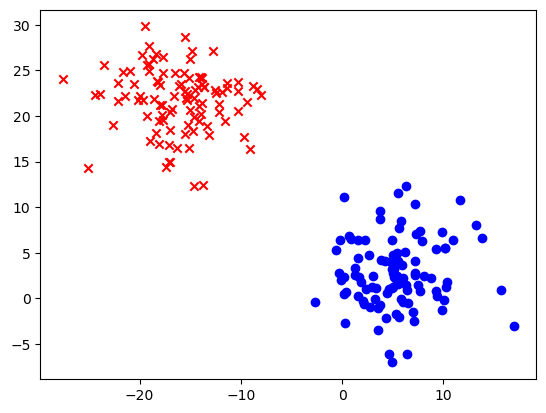

In [12]:
import matplotlib.pyplot as plt
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

### 3.1.2 Classification with a single-layer perceptron and analysis

### 3.1.3 Classification of samples that are not linearly separable

In [13]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX = np.random.normal(mA[0], sigma, n)
aY = np.random.normal(mA[1], sigma, n)
a = np.stack((aX, aY, (-1) * np.ones(n)), axis=1)

# label b
mA = [6, 1]
bX = np.random.normal(mA[0], sigma, n)
bY = np.random.normal(mA[1], sigma, n)
b = np.stack((bX, bY, np.ones(n)), axis=1)

In [14]:
a, b

(array([[ 5.72091101,  1.56486795, -1.        ],
        [ 5.85682046,  2.29992798, -1.        ],
        [ 5.2976952 ,  2.55965325, -1.        ],
        [ 3.88766794,  1.75021645, -1.        ],
        [ 5.79979589,  2.10528577, -1.        ],
        [ 4.84430796,  2.4820343 , -1.        ],
        [ 5.08214811,  2.38426125, -1.        ],
        [ 5.46731641,  2.93484738, -1.        ],
        [ 5.52250718,  1.71313677, -1.        ],
        [ 5.58634828,  2.70010898, -1.        ],
        [ 5.86489753,  1.40258476, -1.        ],
        [ 5.93295771,  1.90071794, -1.        ],
        [ 4.59301395,  2.11121067, -1.        ],
        [ 4.18968644,  1.0478096 , -1.        ],
        [ 5.72336384,  2.33827761, -1.        ],
        [ 5.20774234,  2.54029153, -1.        ],
        [ 5.37969349,  1.51808014, -1.        ],
        [ 5.92622284,  2.04933114, -1.        ],
        [ 5.22700319,  1.76028448, -1.        ],
        [ 3.95196944,  1.40013396, -1.        ],
        [ 4.7239327 

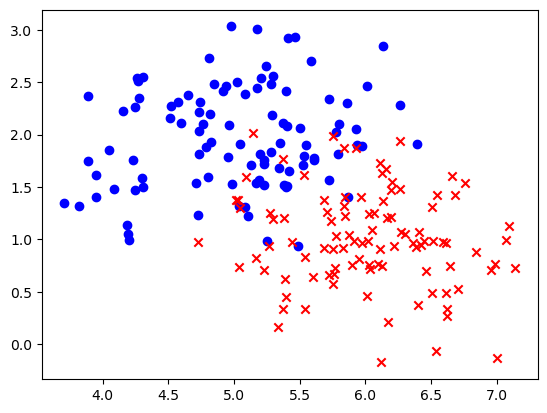

In [15]:
import matplotlib.pyplot as plt
plt.scatter(a[:, 0], a[:, 1], c='b', label='a', marker='o')
plt.scatter(b[:, 0], b[:, 1], c='r', label='b', marker='x')

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

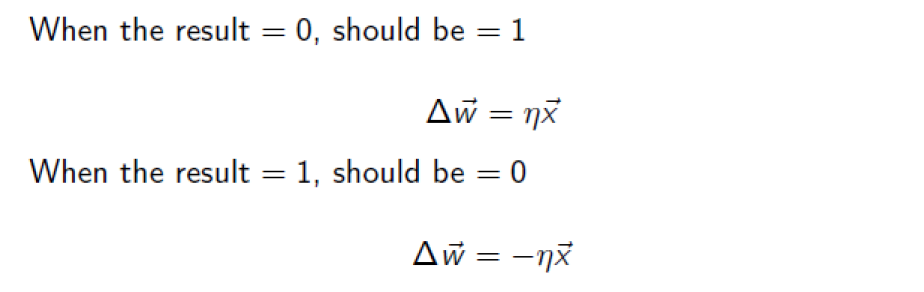

### Example

--------------